# One Discipline: Two Paradigms




### Symbolic AI
<img style="float: right;" src="figures/types_of_Problem_and_AI/mind.png">
Inspired by ideas of the mind and  building on thousands of years of philosophy about:

- what can be known,  
world models, absolute truths
- types of logic, 
- facts, rules, ...

Reasoning with symbols that 'stand for' external entities or 'truths'.
 - this was mainstream AI for decades


### Computational AI: 
<img style="float: right;" src="figures/types_of_Problem_and_AI/brain.jpg">

Inspired by the idea of problem solving arising from  computational processes 
- the brain  
a neural signal processor  
with adaptive connections
- Genetics + Darwinian evolution 
- Social Insect Colonies

All _appear_ to exhibit intelligent problem solving behaviour

 

# How would you describe these three types of fruit?

<div height = 30%>
    <div width=10% >  <img src="./figures/types_of_Problem_and_AI/green_apple.jpg" alt="Picture of an apple">   </div>
</div>  

<div height = 30%>
    <div width=10%>
        <img src="./figures/types_of_Problem_and_AI/orange.jpg" alt="Picture of an orange">   </div>
</div>  

<div height = 30%>
<div width=10%>  <img src="./figures/types_of_Problem_and_AI/banana.jpg" alt="Picture of a banana">   </div>
</div>  

Many people might say:
- Apples are green and round and have smooth skin
- Oranges are orange and round and have rough skin
- Bananas are yellow and long and pointed at both ends and have smooth skin. 

## Symbolic AI says that these are all examples of an abstract class 
e.g. 'Apples', 'Oranges' or 'Bananas'.

To reason about them we make statements in a 'world-model' that are True or False for things of that type
 - A **Model** encoding human expertise is often  called the **'knowledge base'**

A mixture of **Facts**

|          | Apples | Oranges | Bananas |
|----------|--------|---------|---------|
| isGreen  | True   |         |         |
| IsOrange |        | True    |         |
| isYellow |        |         | True    |
| isRound  | True   | True    |         |
| isLong   |        |         | True    |
| isRough  |        | True    |         |
| isSmooth | True   |         | True    |

 And  **logic**   

usually **Rules** that we can apply to generate new facts  

_isRound(x)_ AND _isGreen(x)_  AND _isSmooth(x)_   => _isApple(x)_

_isRound(x)_ AND _isOrange(x)_ AND _isRough(x)_    => _isOrange(x)_

_isLong(x)_  AND _isYellow(x)_ AND _isSmooth(x)_   => _isBanana(x)_

## Using a symbolic AI model for prediction

 <img style="float:right" src = "figures/types_of_Problem_and_AI/lime.jpg">
 
1. Create the **model** by encoding this knowledge  using rules in your chosen type of  logic 
 


 
2. provide **input** in the form of 'assertions' about a new bit of fruit
 - _isRound(newfruit)_ = True
 - _isGreen(newfruit)_ = True
 
 
3. Make a **prediction** by applying logic (deduction) to infer the _**output**_ 
 - _isApple(newfruit)_ = False

## Making this work better

 - 'Closed World Assumption':  
 fill in the gaps in the table by saying  
 "if we don't know it's true, assume it is false"
 
 - Make 'higher level' statements to reduce the number of things to consider  
 'all rough things are not smooth **and vice versa**' 
 
 
 - Logic can be multi-step:  
separate new facts about this instance from world model
 
Once you've defined a model you can use it:
- 'forwards' (data driven) for **prediction**, 
- 'backwards' (goal-driven) for  **optimisation/planning**.

# Take a moment to think if you can see any problems with this

### Let's  look at fruit colour, width,height,weight
#### Colour    
from www.colorhexa.com
-    In a RGB color space, hex #ffe135 (also known as Banana yellow) is composed of 100% red, 88.2% green and 20.8% blue. 
-    In a RGB color space, hex #8db600 (also known as Apple green) is composed of 55.3% red, 71.4% green and 0% blue.
-    In a RGB color space, hex #ffa500 (also known as Orange) is composed of 100% red, 64.7% green and 0% blue.
    
#### size
from quick search on internet (using the _'are sites consistent?'_ heuristic)
-    banana: width 130 +/- 15 mm height 28 +/- 05 cm, weight 125 +/- 10 gm
- apple    width = height = 80mm  +/-    weight = 340 g
- orange   width = height = 76mm   +/-   weight = 357 g
    
    


In [1]:
# values ( mean_red, mean_green, mean_blue,width, height, weight)
typical_banana = (100,88.2,20.8,130,28,125 )
typical_apple = (55.3,71.4,0,80,80,340)
typical_orange = (100,64.7,0,76,76,357)

In [9]:

import pandas as pd, sklearn.datasets as datasets, matplotlib.pyplot as plt

# make ten examples of each type with a bit of random noise added
rgb,label_ids = datasets.make_blobs(
    n_samples = [10,10,10], 
    centers = [typical_banana,typical_apple,typical_orange],
    cluster_std=5.0,n_features=6 )
fruits = pd.DataFrame(rgb,columns=['Red','Green','Blue','Width','Height','Weight'])
fruits['Type'] = label_ids
fruits.replace({'Type':{0:'Banana',1:'Apple',2:'Orange'}},inplace =True)
fruits.to_csv('data/fruits.csv',index=False)

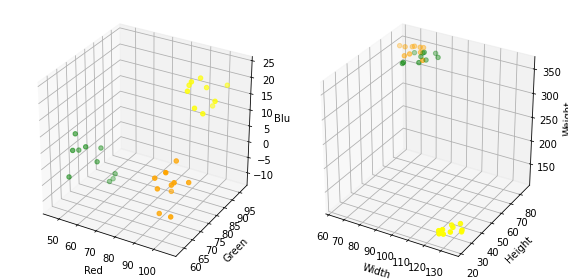

In [10]:
def make3dscatters():
    fig=plt.figure(tight_layout=True,figsize=(8,4))
    displaycolours = fruits['Type'].replace({'Banana':'yellow','Apple':'green','Orange':'orange'})
    ax1 = fig.add_subplot(121, projection='3d') # Method 2
    ax2 = fig.add_subplot(122,projection='3d')
    ax1.scatter(fruits['Red'], fruits['Green'],fruits['Blue'],c=displaycolours, marker='o',label='colours')
    ax1.set_xlabel('Red')
    ax1.set_ylabel('Green')
    ax1.set_zlabel('Blue')
    ax2.scatter(fruits['Width'], fruits['Height'],fruits['Weight'],c=displaycolours, marker='o',label='sizes')
    ax2.set_xlabel('Width'); ax2.set_ylabel('Height'); ax2.set_zlabel('Weight')
    plt.subplots_adjust(left=0.0, right=0.9, top=0.9, bottom=0.1)
    return fig
fig = make3dscatters()
plt.show()

## Symbolic AI
Have to write code  that can:
 - extract meaning from these figures
 - to generate True/False for symbols like isLong() or isYellow()
 - those symbols are what used to do reasoning in the model

# Computational AI: 

- **Machine Learning**  creates models using algorithms that learn by trial and error from datasets (examples)
- **Heuristic Optimisation** takes a similar 'trial and error' approach to finding and improving solutions to optimisation problems

## Our fruit example

1. Decide on a set of features you can measure about objects:  
weight in grammes  
height/width in cm  
mean RGB values of image
2. Measure values of those features for a set of examples  
store these in a Dataset  
one row per example,  
one column for each feature + one column for the label (orange/apple/banana)
3. Apply an algorithm to find decision boundaries that separate the examples into classes    
learned model = set of decision boundaries + labels for the regions they define
4. Make **prediction** by looking at where a new example is in relation to those boundaries

In [11]:
fruits.head(10)

,Red,Green,Blue,Width,Height,Weight,Type
0,58.419302,74.945625,-10.183374,70.887974,82.750860,337.587731,Apple
1,45.829447,69.235825,5.463471,77.003931,81.743449,343.717413,Apple
2,92.292373,84.093548,21.273678,134.796840,29.409867,123.092435,Banana
3,105.985330,58.011805,-4.247407,79.441072,75.705266,356.768309,Orange
4,47.850211,63.244957,-4.979447,78.923563,80.049663,349.511334,Apple
5,94.572391,71.486674,-5.145327,76.449013,79.931436,357.988192,Orange
6,97.330550,92.943215,12.071315,124.226718,24.354769,124.829183,Banana
7,106.397583,83.016001,19.137900,127.192286,24.077344,121.392533,Banana
8,96.226021,78.434724,22.470557,126.568735,33.012071,120.862106,Banana
9,100.145077,78.163264,18.153037,135.247303,29.088720,127.887843,Banana


# Summary
## Two different approaches,  both with strengths and weaknesses
 1. Symbolic (Knowledge-based):
  - based on logic, facts and rules
  - uses a human-provided world model
 2. Computational AI
  - Algorithms that learn from experience
  - only as good as their experience
  

## Key Difference: 
In symbolic AI everything 'stands for' something in the real world.

- So you might write a function: Bool  isYellow( inr red, int green, int blue)
 - but it would be meangingless to pass values for width/height/weight into isYellow()
 - and the rules that define the 'fruit' model can't be used for anything else

In Computational AI 'everything is just numbers', 
- nothing has any special meaning
- so algorithms become more re-usable.

## You need to be able to: 
 - **Describe** the differences between these approaches
 - **Select** (and explain) whether to choose a computational or knowledge-based solution  
 to solve a given problem _in it's context_. 
 